In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # pip install statsmodels
import numpy as np

# Task 3: Invertibility, ACF, PACF of MA models

In [2]:
def draw_line_plots(all_series_titles):
    """
    all_series_titles; [(series1, title1), (series2, title2), ...]
    plot in 2 columns
    """
    n = len(all_series_titles)
    n_rows = n // 2 + n % 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(25, 10 * n_rows))
    for i, (series, title) in enumerate(all_series_titles):
        ax = axs[i // 2, i % 2]
        series.plot(ax=ax)
        ax.set_title(title)

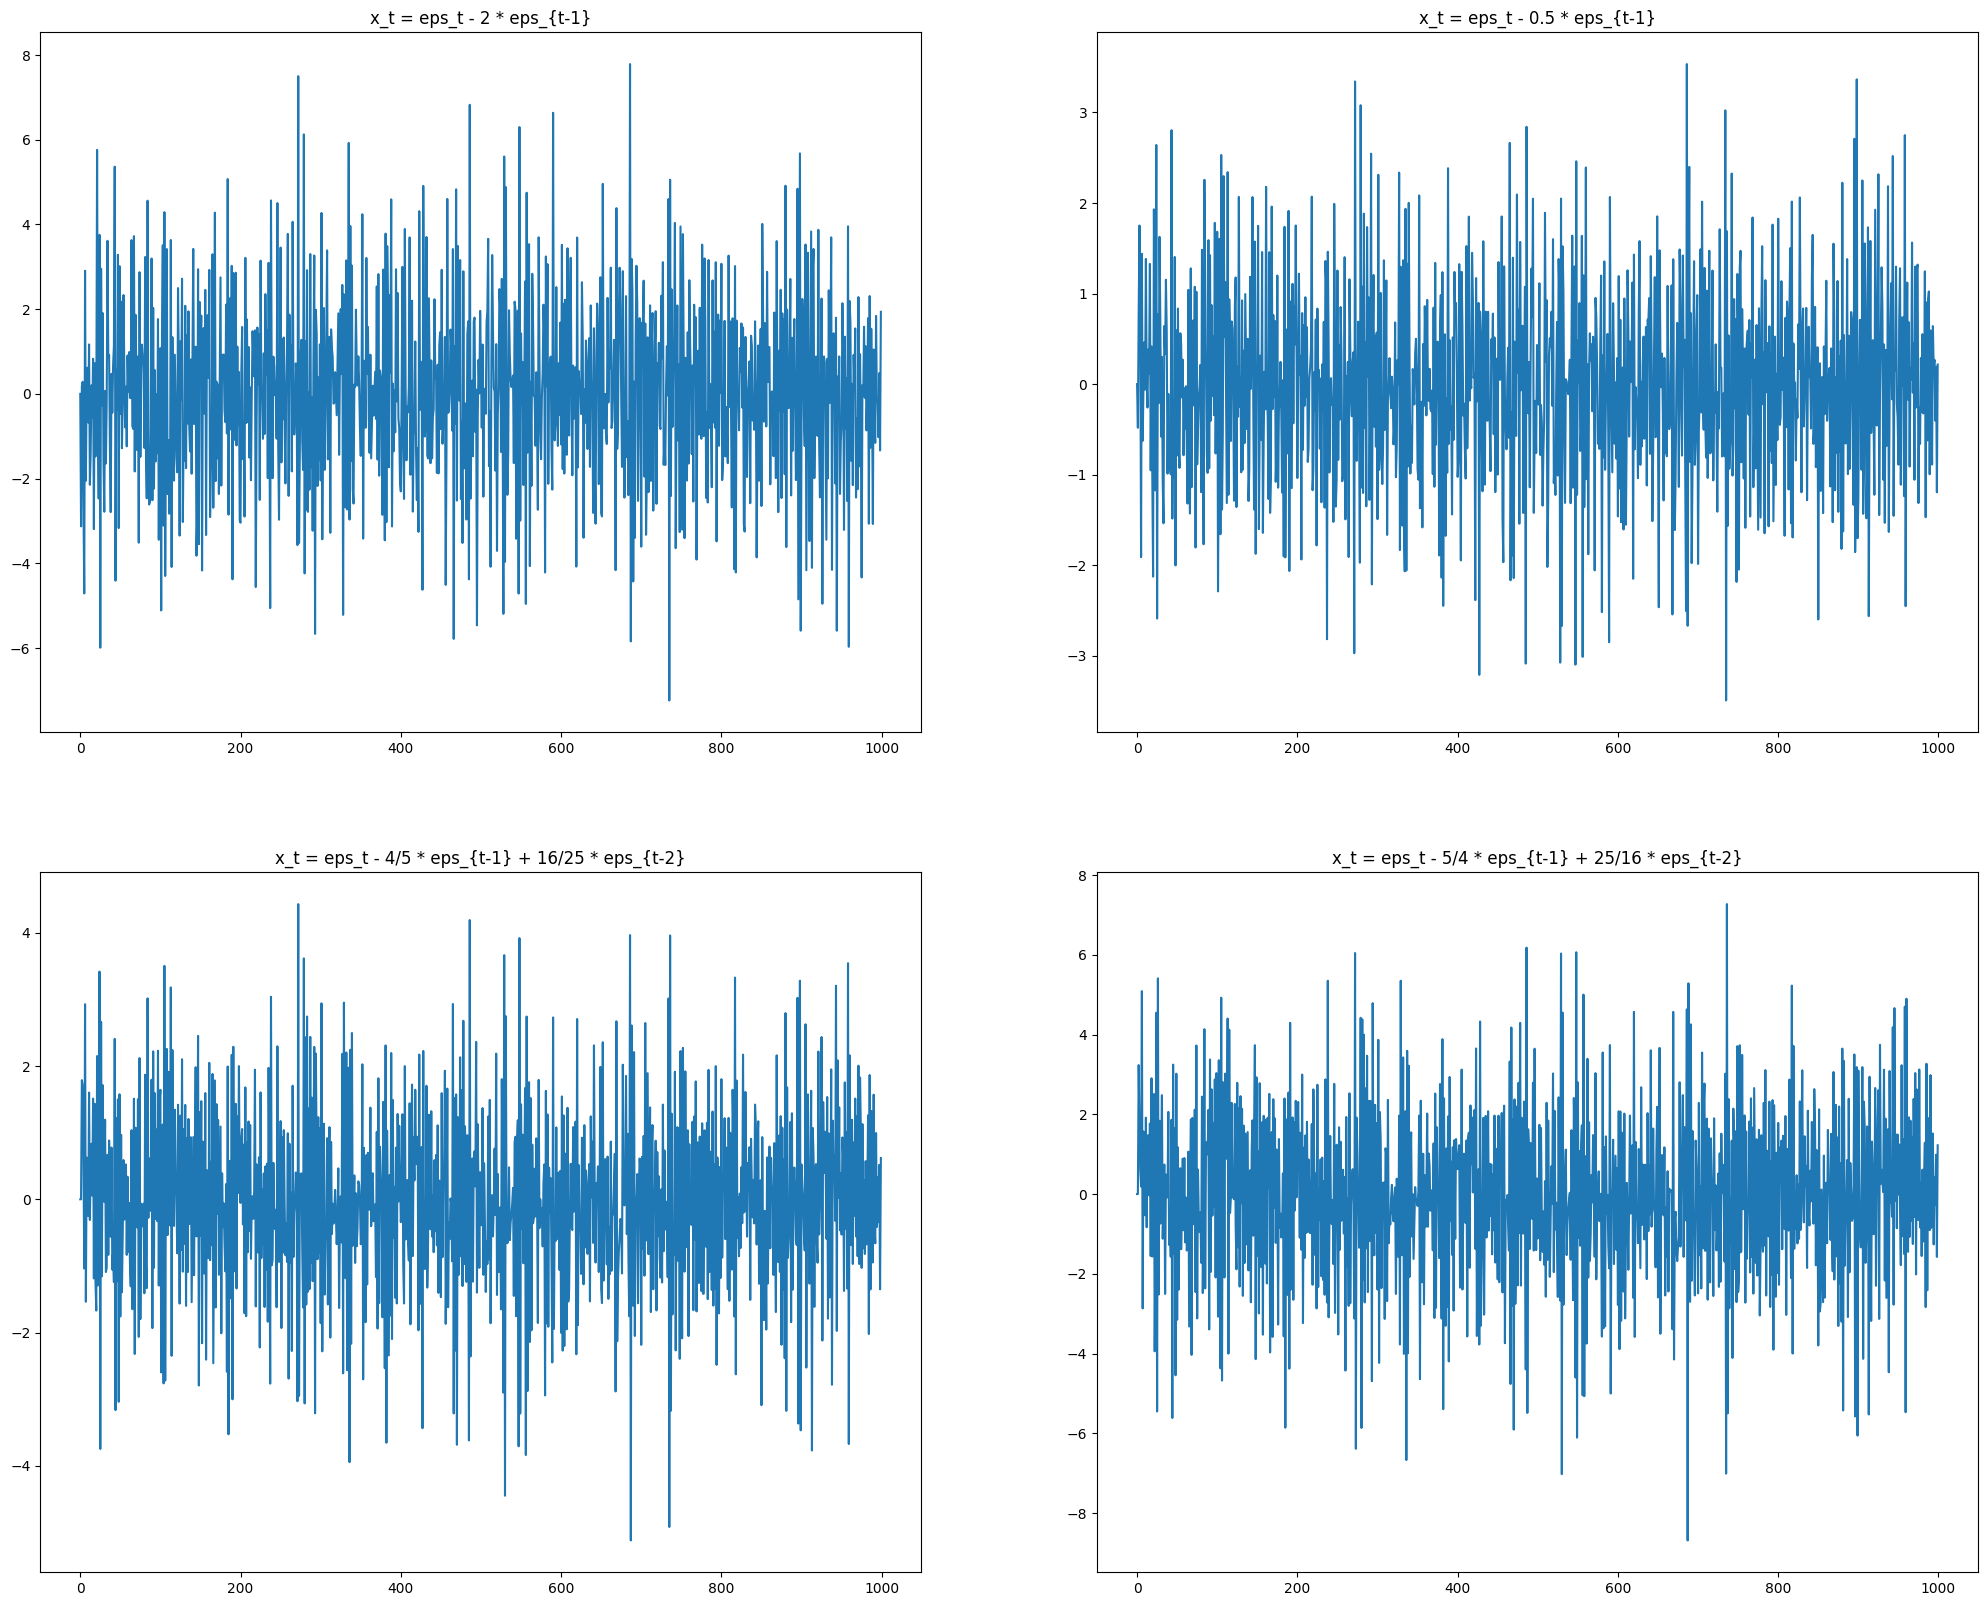

In [4]:
# MA(1) x_t = eps_t - 2 * eps_{t-1}
# MA(2) x_t = eps_t - 0.5 * eps_{t-1}
# MA(3) x_t = eps_t - 4/5 * eps_{t-1} + 16/25 * eps_{t-2}
# MA(4) x_t = eps_t - 5/4 * eps_{t-1} + 25/16 * eps_{t-2} 

np.random.seed(0)

noise = np.random.normal(0, 1, 1000) # eps_t

series1 = [0]
for i in range(1, 1000):
    series1.append(noise[i] - 2 * noise[i - 1])
series1 = pd.Series(series1)

series2 = [0]
for i in range(1, 1000):
    series2.append(noise[i] - 0.5 * noise[i - 1])
series2 = pd.Series(series2)

series3 = [0, 0]
for i in range(2, 1000):
    series3.append(noise[i] - 4/5 * noise[i - 1] + 16/25 * noise[i - 2])
series3 = pd.Series(series3)

series4 = [0, 0]
for i in range(2, 1000):
    series4.append(noise[i] - 5/4 * noise[i - 1] + 25/16 * noise[i - 2])
series4 = pd.Series(series4)

draw_line_plots([(series1, "x_t = eps_t - 2 * eps_{t-1}"), (series2, "x_t = eps_t - 0.5 * eps_{t-1}"), (series3, "x_t = eps_t - 4/5 * eps_{t-1} + 16/25 * eps_{t-2}"), (series4, "x_t = eps_t - 5/4 * eps_{t-1} + 25/16 * eps_{t-2}")])


In [5]:
maparams1 = np.r_[1, np.array([-2])]
maparams2 = np.r_[1, np.array([-0.5])]
maparams3 = np.r_[1, np.array([-4/5, 16/25])]
maparams4 = np.r_[1, np.array([-5/4, 25/16])]

arma_process1 = sm.tsa.ArmaProcess(ma=maparams1)
arma_process2 = sm.tsa.ArmaProcess(ma=maparams2)
arma_process3 = sm.tsa.ArmaProcess(ma=maparams3)
arma_process4 = sm.tsa.ArmaProcess(ma=maparams4)

print("Model 1 is invertible: ", arma_process1.isinvertible)
print("Model 2 is invertible: ", arma_process2.isinvertible)
print("Model 3 is invertible: ", arma_process3.isinvertible)
print("Model 4 is invertible: ", arma_process4.isinvertible)



Model 1 is invertible:  False
Model 2 is invertible:  True
Model 3 is invertible:  True
Model 4 is invertible:  False


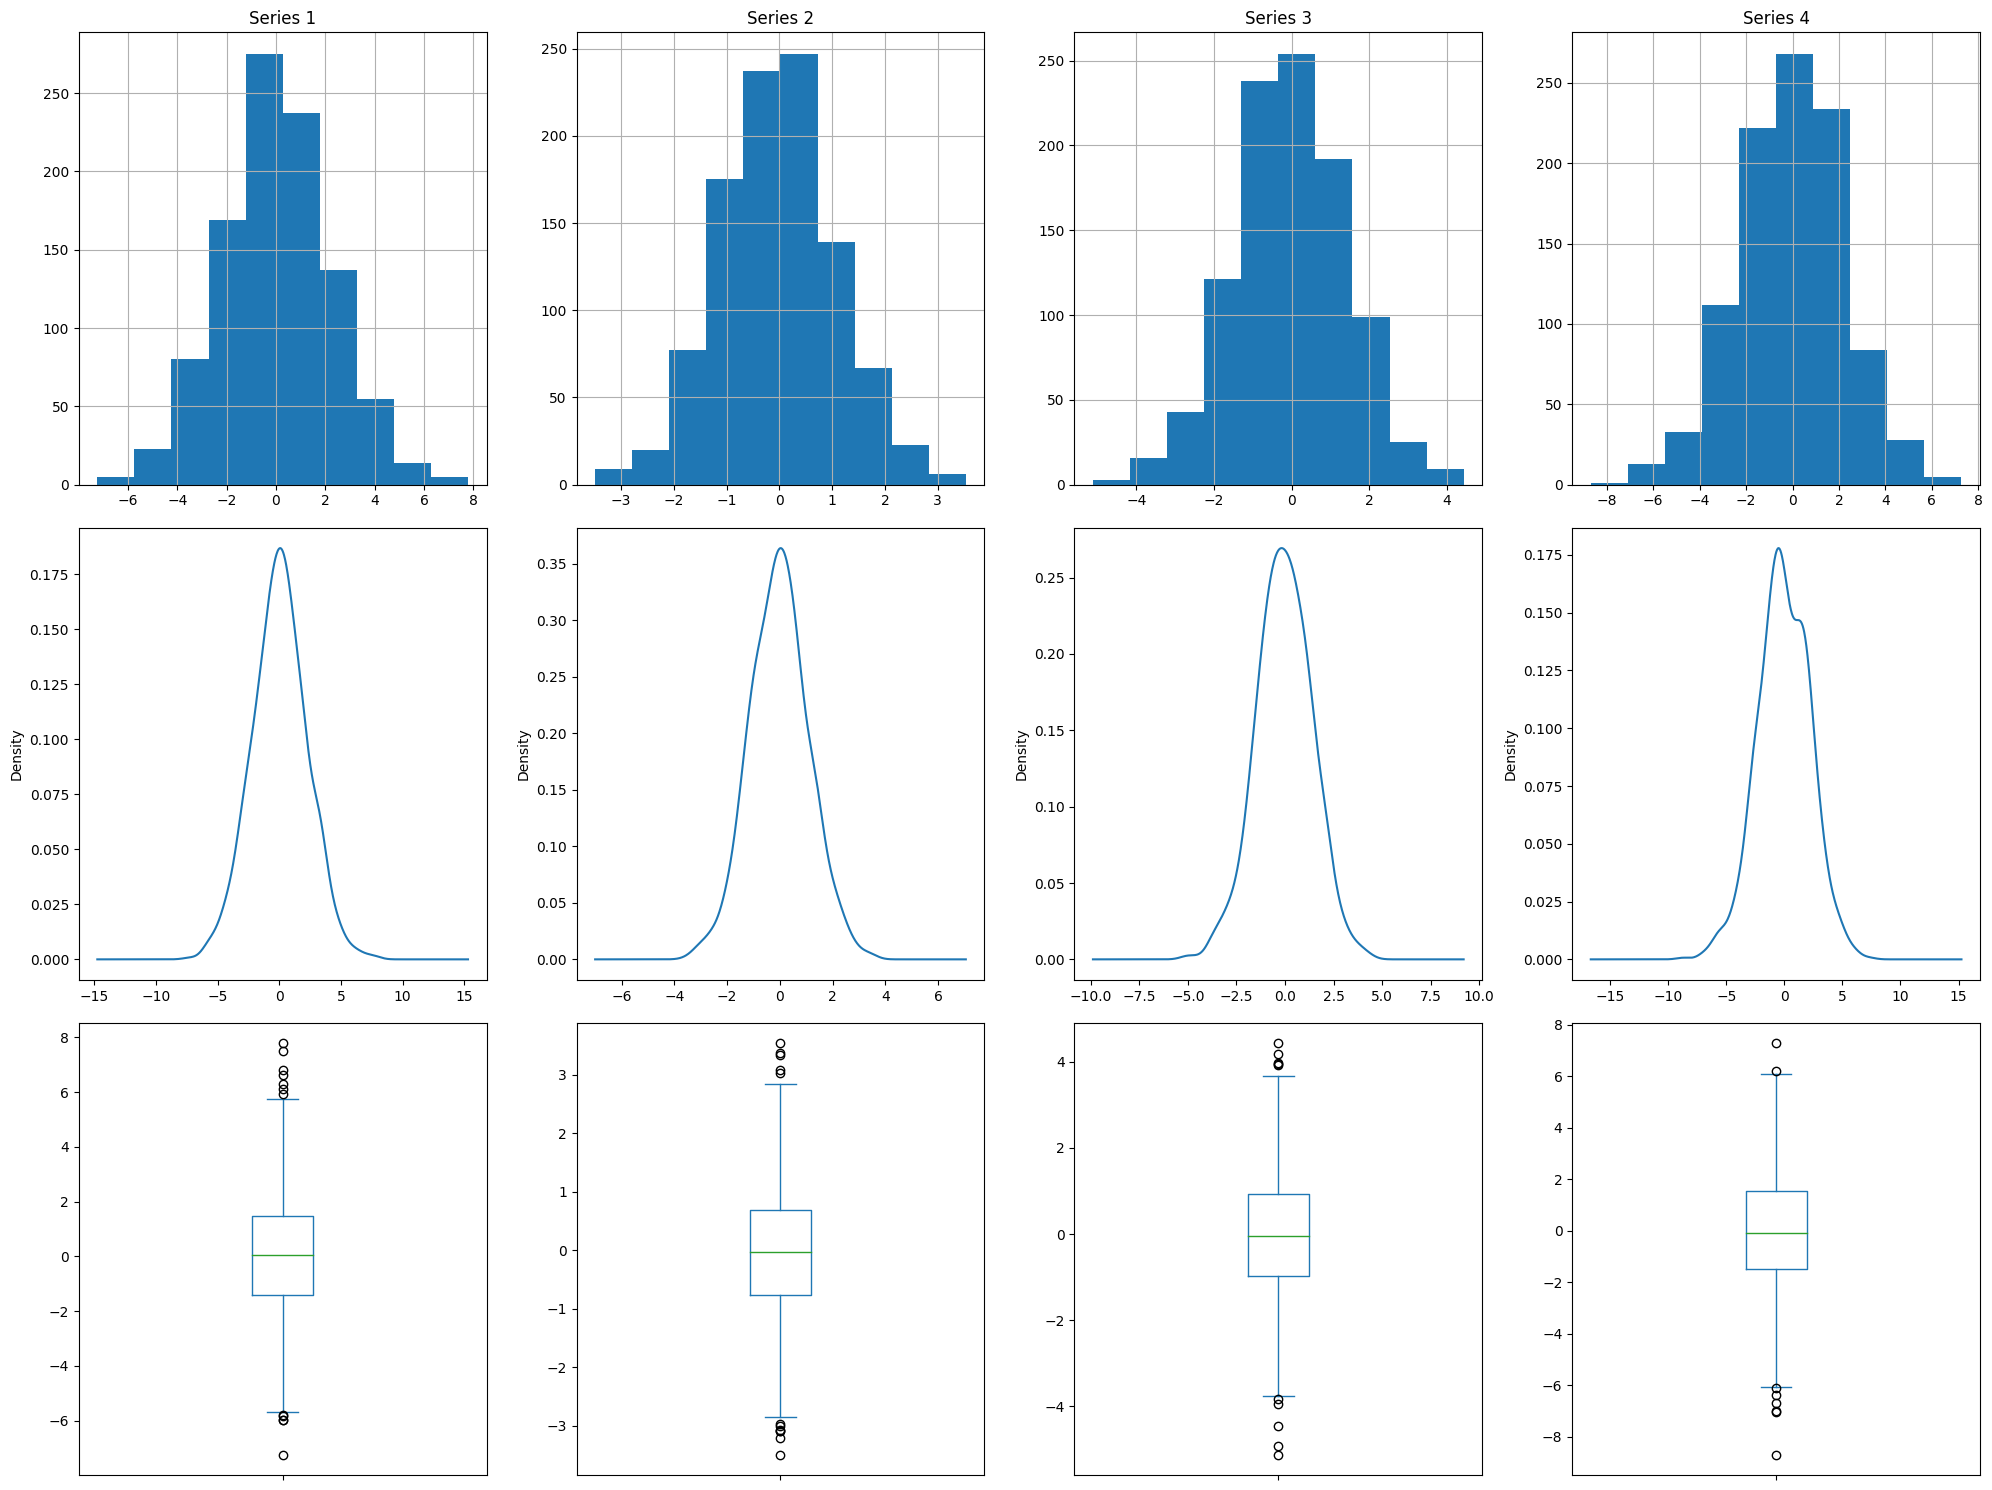

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
series = [series1, series2, series3, series4]
titles = ['Series 1', 'Series 2', 'Series 3', 'Series 4']  # Add the titles for each column

for i in range(4):
    axs[0, i].set_title(titles[i])  # Set the title for the top subplot in each column
    series[i].hist(ax=axs[0, i])
    series[i].plot(kind='kde', ax=axs[1, i])
    series[i].plot(kind='box', ax=axs[2, i])

plt.tight_layout()
plt.show()

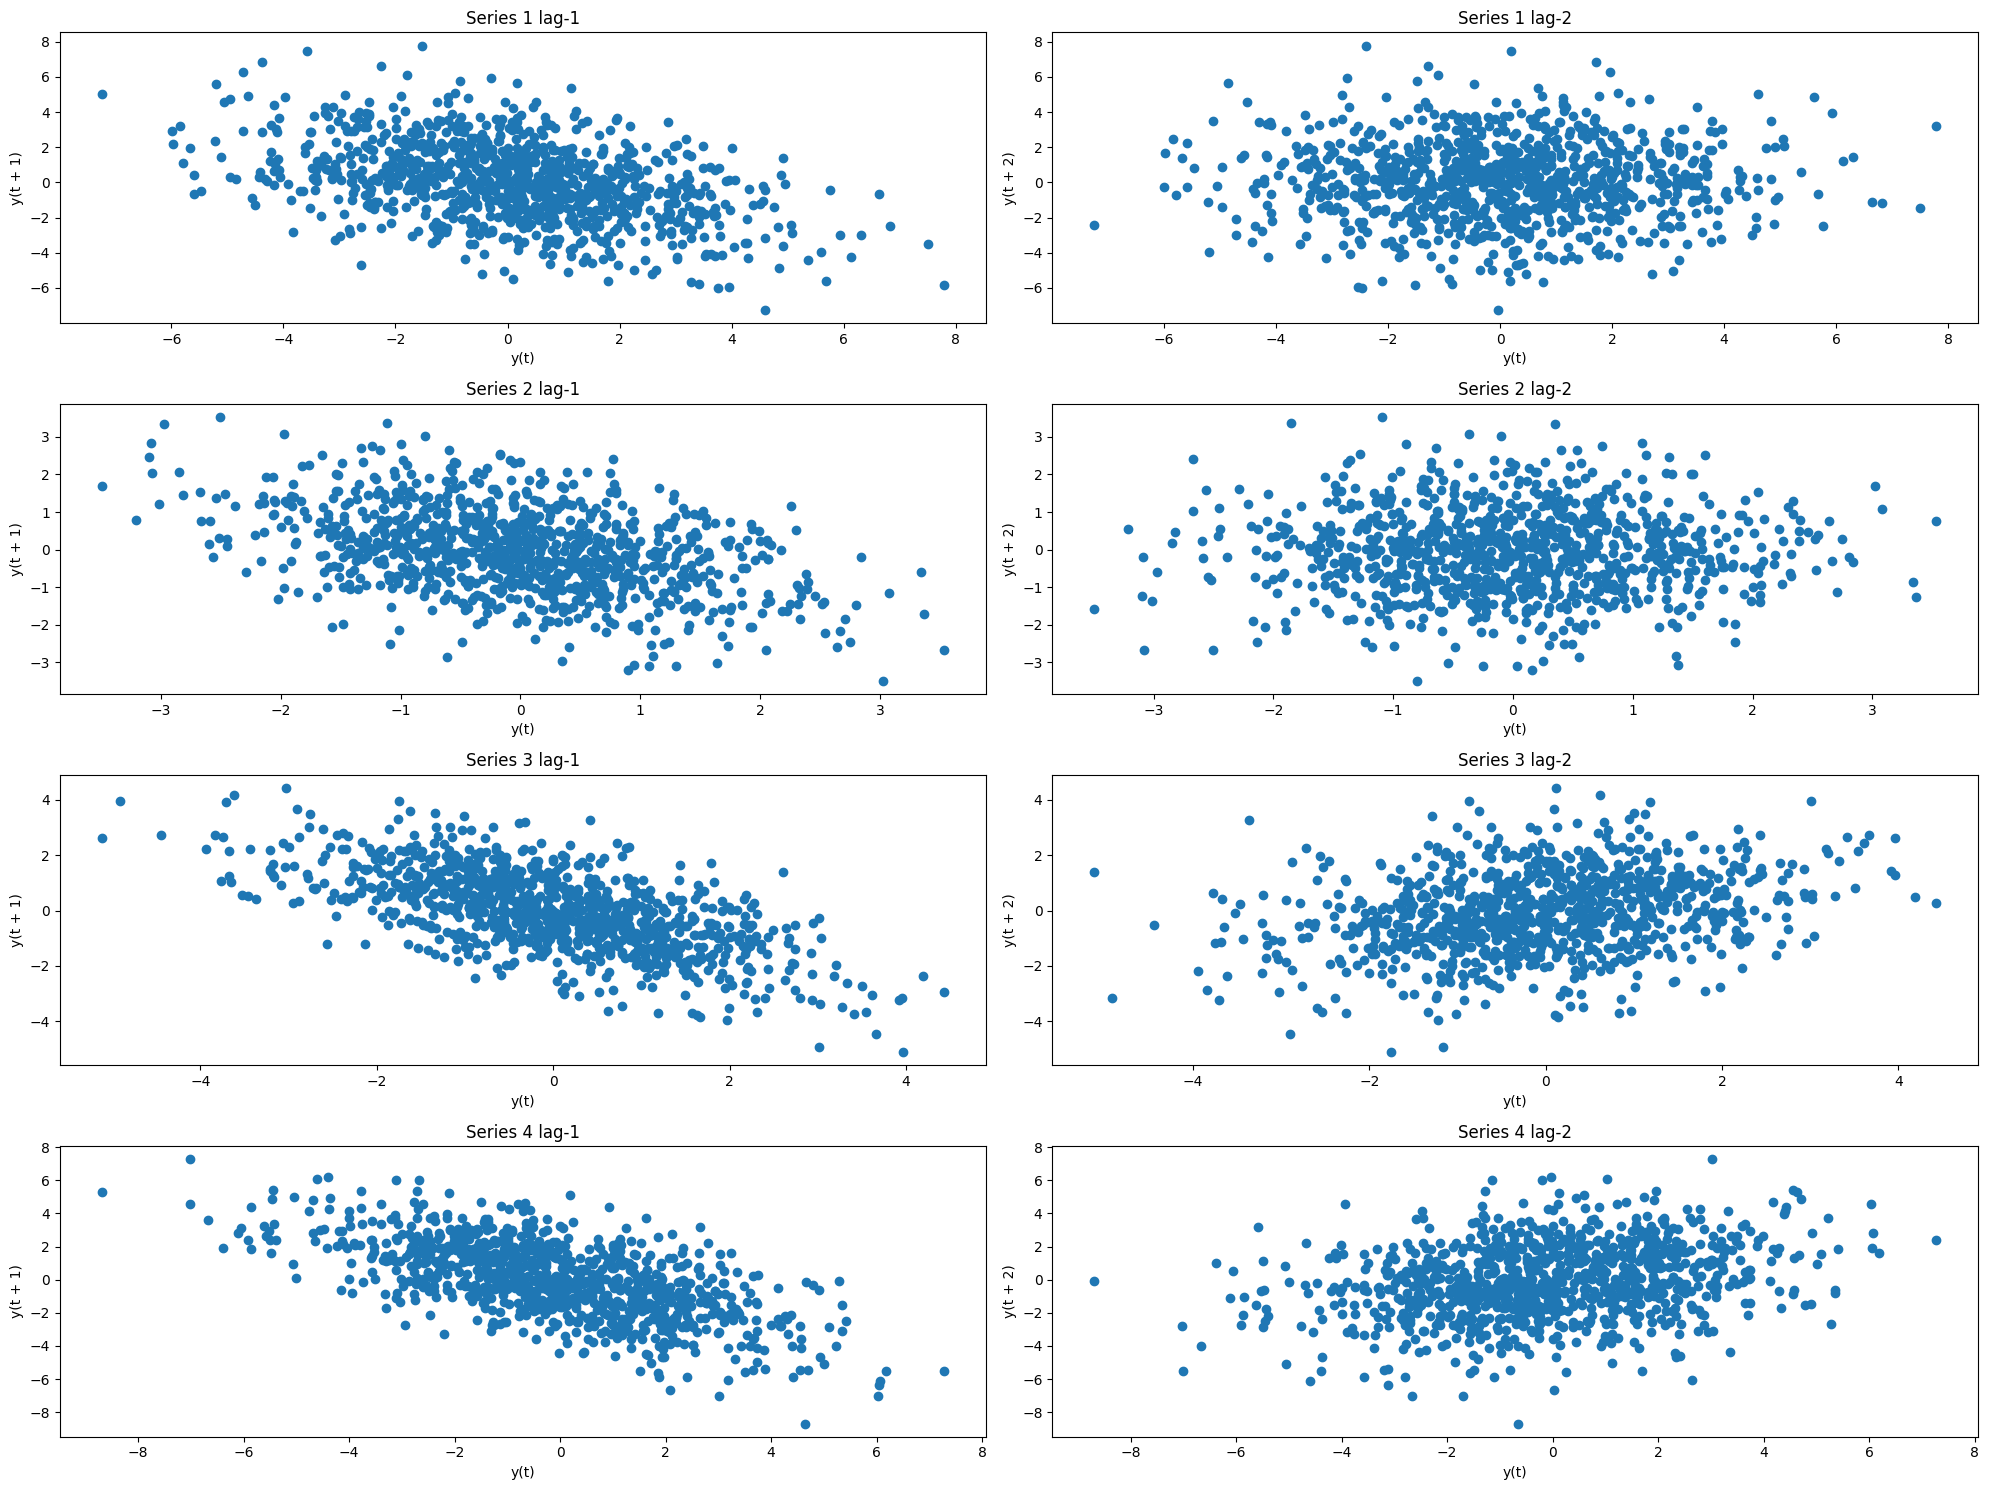

In [7]:
# draw lag-1 and lag-2 plots
fig, axs = plt.subplots(4, 2, figsize=(20, 15))
for i in range(4):
    pd.plotting.lag_plot(series[i], lag=1, ax=axs[i, 0])
    pd.plotting.lag_plot(series[i], lag=2, ax=axs[i, 1])
    axs[i, 0].set_title(titles[i] + ' lag-1')
    axs[i, 1].set_title(titles[i] + ' lag-2')
plt.tight_layout()
plt.show()

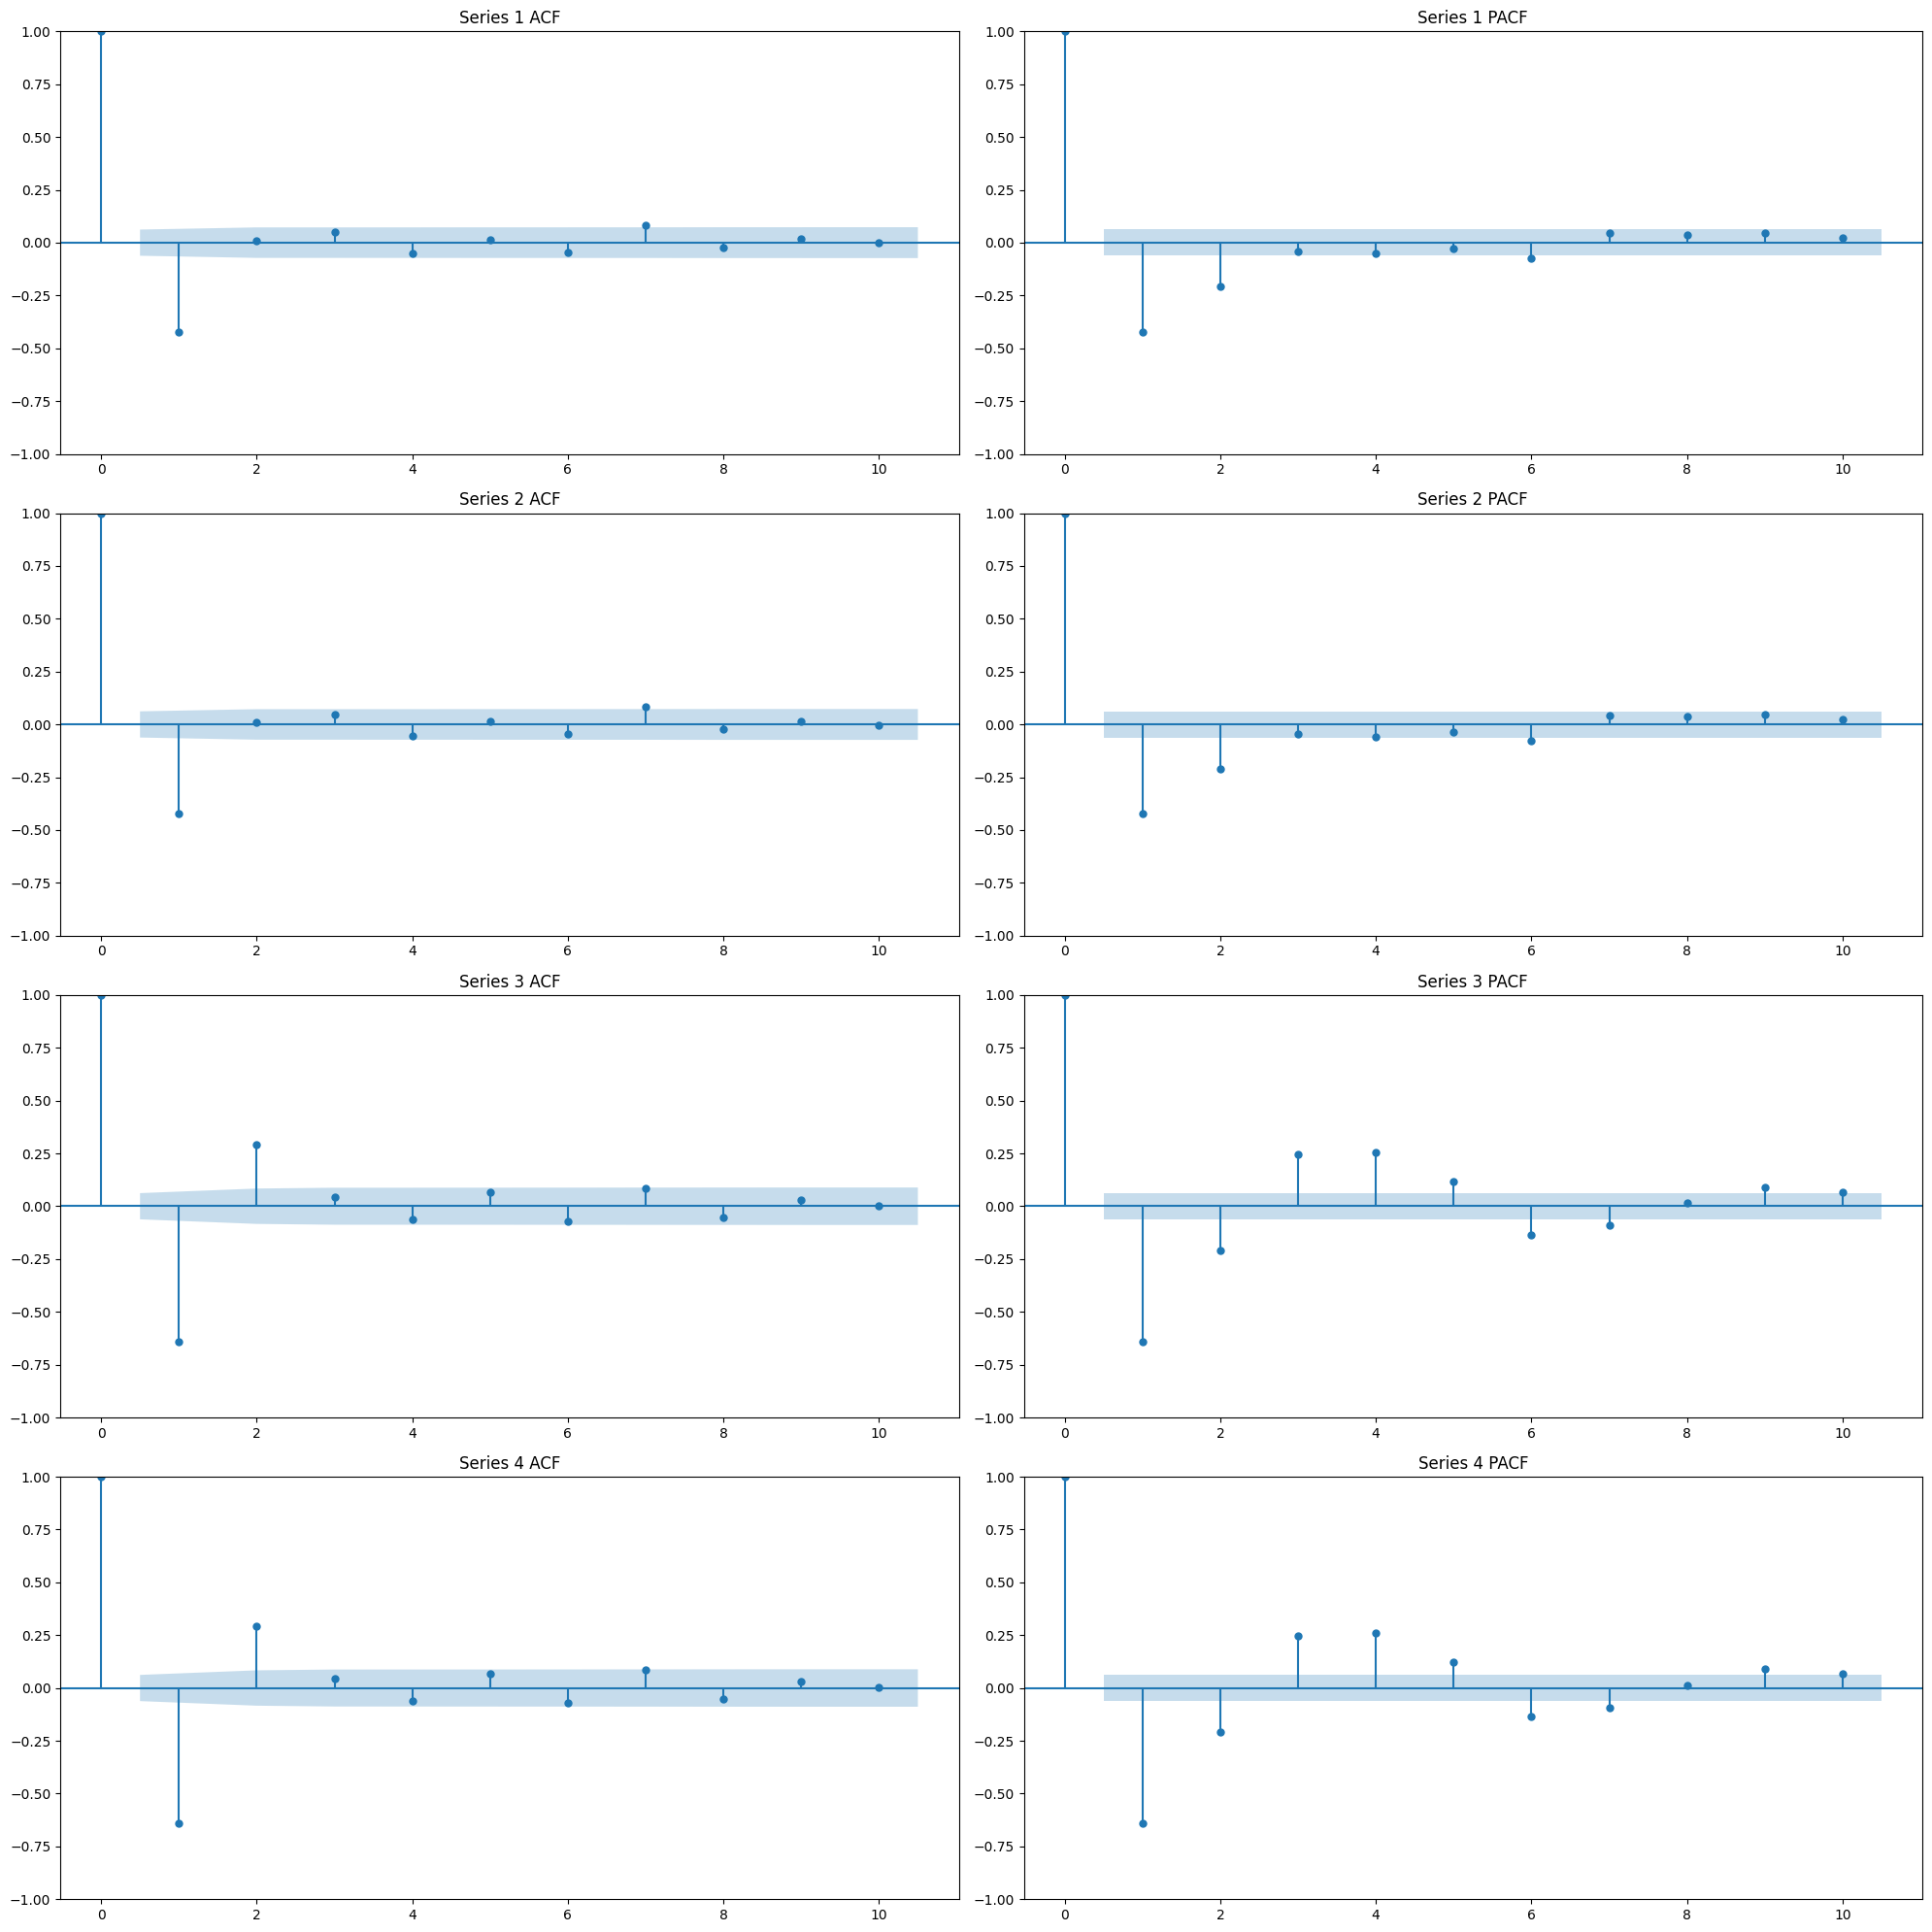

In [8]:
# Draw ACF and PACF plots for each series
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
for i in range(4):
    sm.graphics.tsa.plot_acf(series[i], lags=10, ax=axs[i, 0])
    sm.graphics.tsa.plot_pacf(series[i], lags=10, ax=axs[i, 1])
    axs[i, 0].set_title(titles[i] + ' ACF')
    axs[i, 1].set_title(titles[i] + ' PACF')
    
plt.tight_layout()
plt.show()